In [4]:
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import sys,os
from importlib import reload

In [5]:
 fit_verbosity = 1

In [6]:
fidle.override('fit_verbosity')

# Retrieve data

In [7]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(-1,28,28,1)
x_test  = x_test.reshape(-1,28,28,1)

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
x_train :  (60000, 28, 28, 1)
y_train :  (60000,)
x_test  :  (10000, 28, 28, 1)
y_test  :  (10000,)


# Preparing data

In [8]:
print('Before normalization : Min={}, max={}'.format(x_train.min(),x_train.max()))

xmax=x_train.max()
x_train = x_train / xmax
x_test  = x_test  / xmax

print('After normalization  : Min={}, max={}'.format(x_train.min(),x_train.max()))

Before normalization : Min=0, max=255
After normalization  : Min=0.0, max=1.0


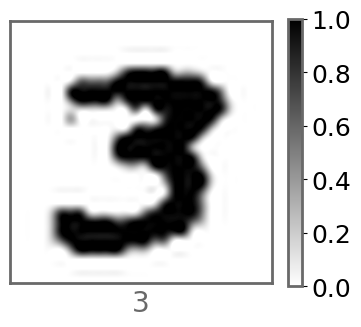

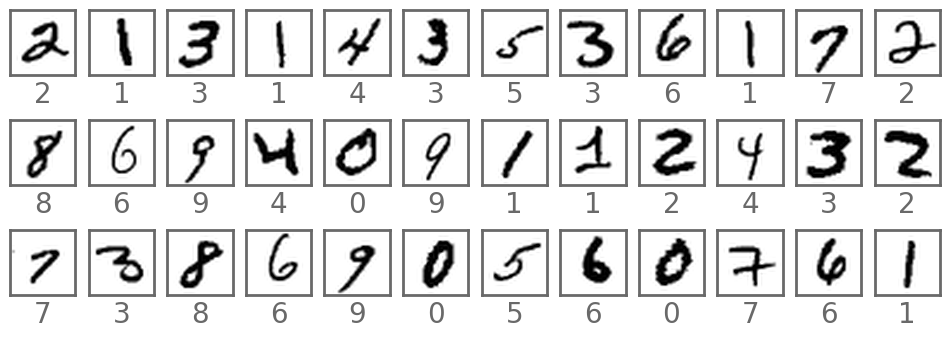

In [10]:
fidle.scrawler.images(x_train, y_train, [27],  x_size=5,y_size=5, colorbar=True, save_as='01-one-digit')
fidle.scrawler.images(x_train, y_train, range(5,41), columns=12, save_as='02-many-digits')

# Model

In [9]:
model = keras.models.Sequential()

model.add( keras.layers.Input((28,28,1)) )

model.add( keras.layers.Conv2D(8, (3,3),  activation='relu') )
model.add( keras.layers.MaxPooling2D((2,2)))
model.add( keras.layers.Dropout(0.2))

model.add( keras.layers.Conv2D(16, (3,3), activation='relu') )
model.add( keras.layers.MaxPooling2D((2,2)))
model.add( keras.layers.Dropout(0.2))

model.add( keras.layers.Flatten()) 
model.add( keras.layers.Dense(100, activation='relu'))
model.add( keras.layers.Dropout(0.5))

model.add( keras.layers.Dense(10, activation='softmax'))

In [11]:
model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 16)          0

# Train

In [12]:
batch_size  = 512
epochs      =  16

history = model.fit(  x_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = fit_verbosity,
                      validation_data = (x_test, y_test))

Epoch 1/16
118/118 [==============================] - 21s 6ms/step - loss: 1.1758 - accuracy: 0.6204 - val_loss: 0.2846 - val_accuracy: 0.9263
Epoch 2/16
118/118 [==============================] - 0s 4ms/step - loss: 0.3755 - accuracy: 0.8857 - val_loss: 0.1476 - val_accuracy: 0.9567
Epoch 3/16
118/118 [==============================] - 0s 4ms/step - loss: 0.2632 - accuracy: 0.9201 - val_loss: 0.1042 - val_accuracy: 0.9677
Epoch 4/16
118/118 [==============================] - 0s 4ms/step - loss: 0.2175 - accuracy: 0.9344 - val_loss: 0.0840 - val_accuracy: 0.9739
Epoch 5/16
118/118 [==============================] - 0s 4ms/step - loss: 0.1887 - accuracy: 0.9424 - val_loss: 0.0721 - val_accuracy: 0.9773
Epoch 6/16
118/118 [==============================] - 0s 4ms/step - loss: 0.1693 - accuracy: 0.9492 - val_loss: 0.0639 - val_accuracy: 0.9786
Epoch 7/16
118/118 [==============================] - 0s 4ms/step - loss: 0.1588 - accuracy: 0.9528 - val_loss: 0.0577 - val_accuracy: 0.9813
Epoch

# Evaluate

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)

print(f'Test loss     : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

Test loss     : 0.0371
Test accuracy : 0.9876


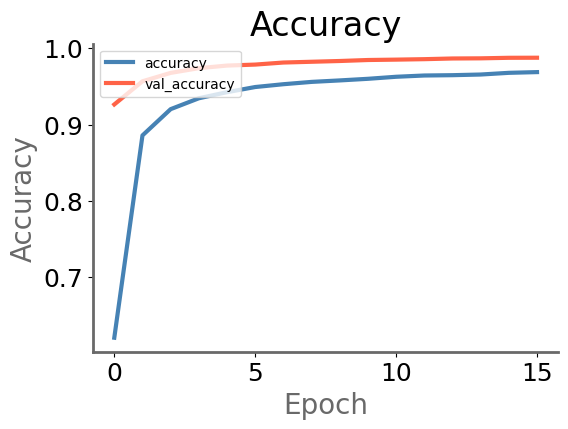

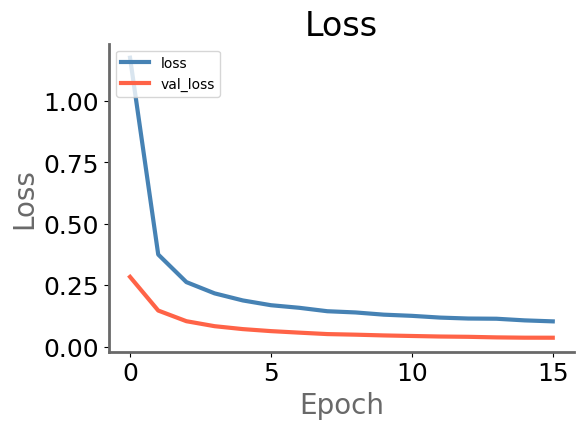

In [14]:
fidle.scrawler.history(history, figsize=(6,4), save_as='03-history')

313/313 [==============================] - 0s 875us/step


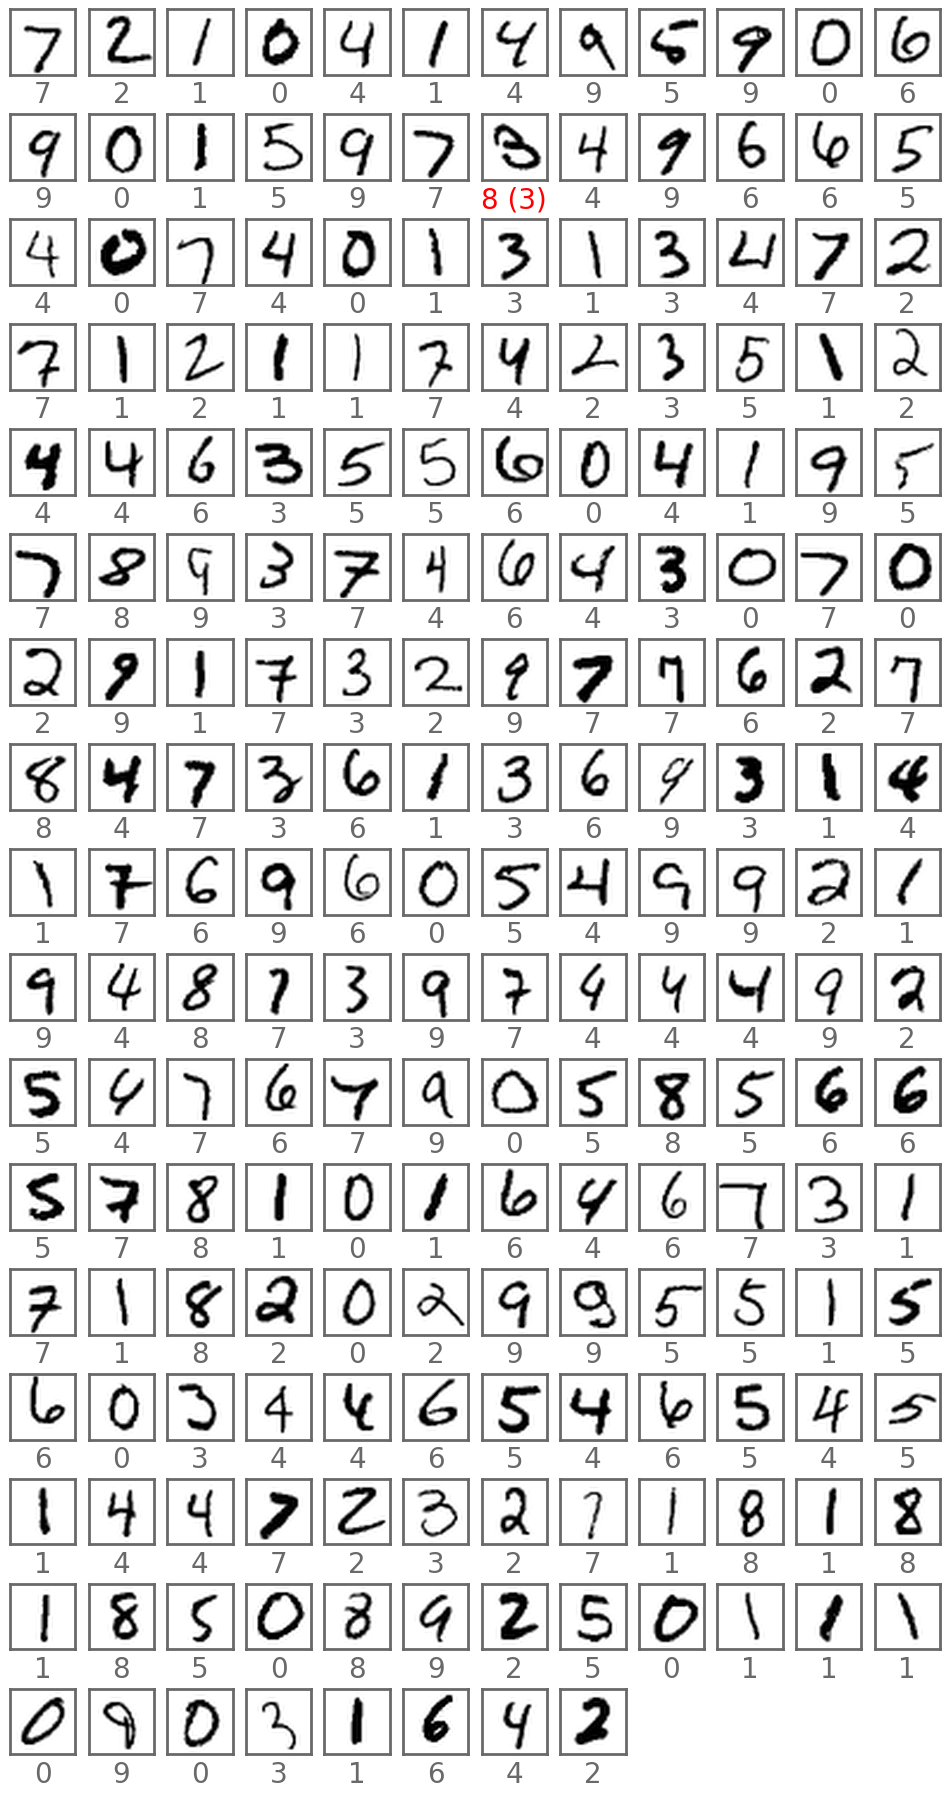

In [15]:
#y_pred   = model.predict_classes(x_test)           Deprecated after 01/01/2021 !!

y_sigmoid = model.predict(x_test)
y_pred    = np.argmax(y_sigmoid, axis=-1)

fidle.scrawler.images(x_test, y_test, range(0,200), columns=12, x_size=1, y_size=1, y_pred=y_pred, save_as='04-predictions')

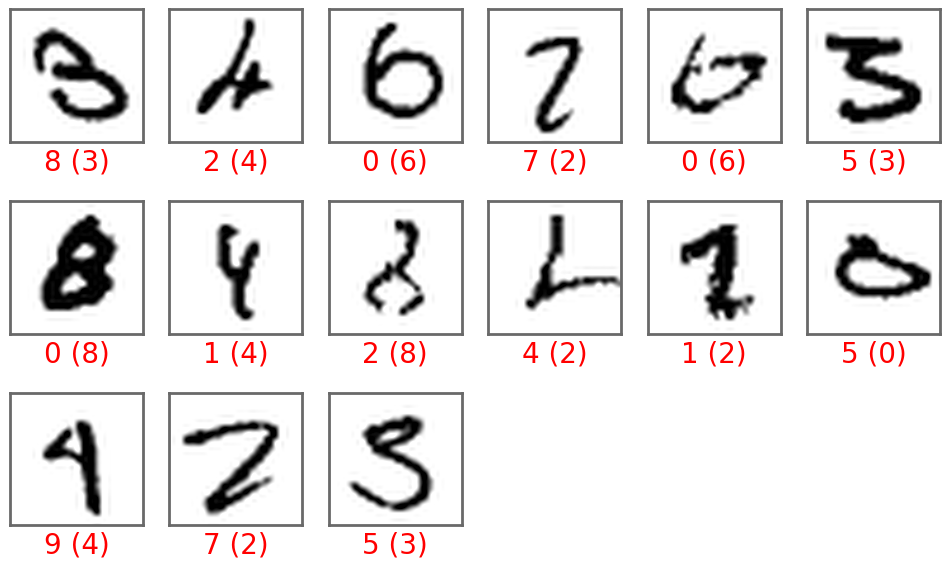

In [16]:
errors=[ i for i in range(len(x_test)) if y_pred[i]!=y_test[i] ]
errors=errors[:min(24,len(errors))]
fidle.scrawler.images(x_test, y_test, errors[:15], columns=6, x_size=2, y_size=2, y_pred=y_pred, save_as='05-some-errors')

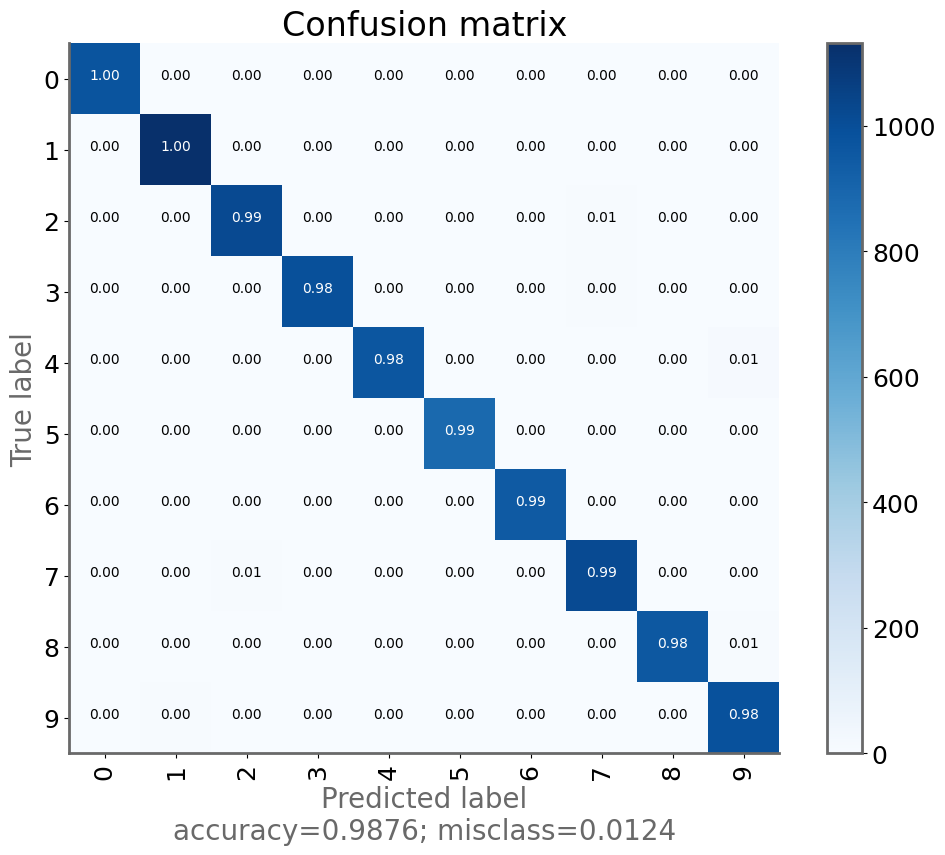

In [17]:
fidle.scrawler.confusion_matrix(y_test,y_pred,range(10),normalize=True, save_as='06-confusion-matrix')